# Reducción de Dimensionalidad

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [9]:
random_state=42

## Ejercicio Práctico

Para el dataset de ***Iris*** realice:


1.   PCA a dos dimensiones y grafique con las etiquetas reales
2.   t-SNE a dos dimensiones y grafique con las etiquetas reales.
  - Cambie el valor del perplexity y escoja el que mejor separación de los clústers obtenga.



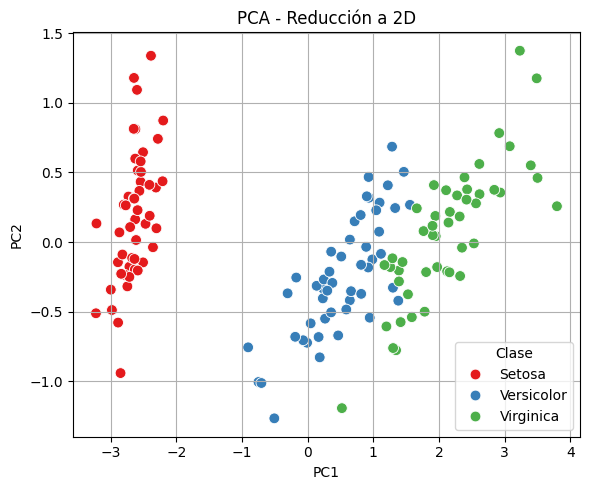

In [ ]:
# Cargar datos
X, y = load_iris(return_X_y=True)
target_names = ["Setosa", "Versicolor", "Virginica"]

# PCA
X_pca = PCA(n_components=2).fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Clase"] = [target_names[label] for label in y]

# Gráfico PCA
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Clase", palette="Set1", s=60)
plt.title("PCA - Reducción a 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True) 
plt.tight_layout()
plt.show()

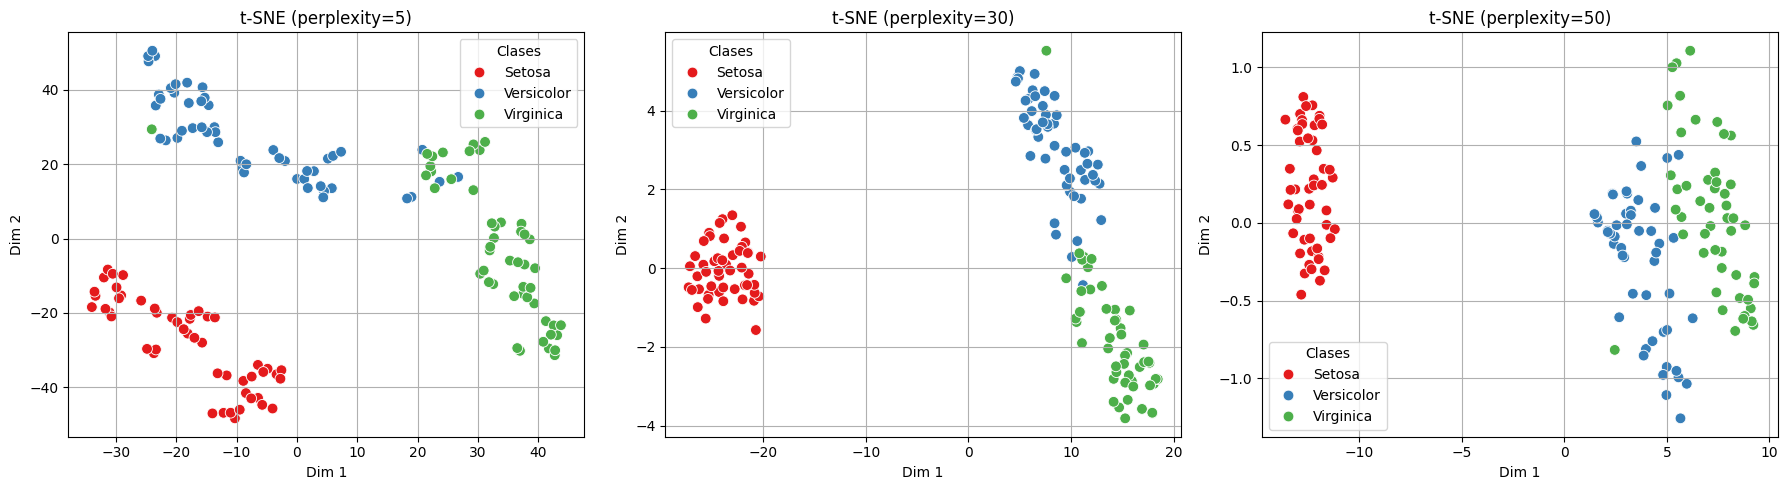

In [5]:
clases = [target_names[label] for label in y]
# t-SNE con distintos valores de perplexity
perplexities = [5, 30, 50]
plt.figure(figsize=(18, 5))

for i, perp in enumerate(perplexities):
    X_tsne = TSNE(n_components=2, perplexity=perp, random_state=42).fit_transform(X)
    df_tsne = pd.DataFrame(X_tsne, columns=["Dim 1", "Dim 2"])
    df_tsne["Clase"] = clases

    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_tsne, x="Dim 1", y="Dim 2", hue="Clase", palette="Set1", s=60)
    plt.title(f"t-SNE (perplexity={perp})")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend(title="Clases")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Ejemplo Extra: PCA Manual

In [6]:
import numpy as np

In [7]:
X_pca_2 = X - np.mean(X, axis=0)
Cov = np.cov(X_pca_2.T)
u, s, vh = np.linalg.svd(Cov)
X_pca_2 = X_pca_2 @ u[:, :2]

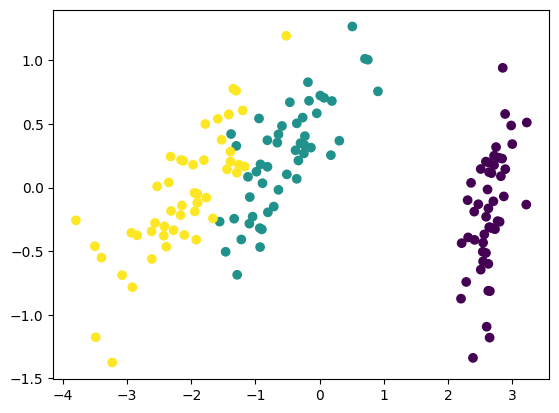

In [8]:
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y)
plt.show()